In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('../data/train.csv')

In [53]:
df.isna().sum()

date      0
family    0
sales     0
dtype: int64

In [7]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [12]:
df = df[['date', 'family', 'sales']]
df['date'] = pd.to_datetime(df['date'])


In [19]:
df[df['family']=='AUTOMOTIVE']

,date,family,sales
0,2013-01-01,AUTOMOTIVE,0.0
33,2013-01-01,AUTOMOTIVE,0.0
66,2013-01-01,AUTOMOTIVE,0.0
99,2013-01-01,AUTOMOTIVE,0.0
132,2013-01-01,AUTOMOTIVE,0.0
...,...,...,...
3000723,2017-08-15,AUTOMOTIVE,8.0
3000756,2017-08-15,AUTOMOTIVE,7.0
3000789,2017-08-15,AUTOMOTIVE,5.0
3000822,2017-08-15,AUTOMOTIVE,4.0


In [35]:
df_grouped = df.groupby(['date', 'family'])['sales'].sum().reset_index()

In [ ]:
df_grouped

,date,family,sales
0,2013-01-01,AUTOMOTIVE,0.000000
1,2013-01-01,BABY CARE,0.000000
2,2013-01-01,BEAUTY,2.000000
3,2013-01-01,BEVERAGES,810.000000
4,2013-01-01,BOOKS,0.000000
...,...,...,...
55567,2017-08-15,POULTRY,17586.709986
55568,2017-08-15,PREPARED FOODS,4641.522980
55569,2017-08-15,PRODUCE,125108.971000
55570,2017-08-15,SCHOOL AND OFFICE SUPPLIES,2530.000000


# grouping

In [40]:
df_sales = df.groupby(['date'])['sales'].sum().reset_index()

In [47]:
df_sales['sales'].describe()

count    1.684000e+03
mean     6.375564e+05
std      2.344102e+05
min      2.511619e+03
25%      4.427115e+05
50%      6.321889e+05
75%      7.859455e+05
max      1.463084e+06
Name: sales, dtype: float64

In [ ]:
scaler = MinMaxScaler()
df_sales['normalized_sales'] = scaler.fit_transform(df_sales[['sales']])

In [58]:
df_sales

,date,sales,normalized_sales
0,2013-01-01,2511.618999,0.000000
1,2013-01-02,496092.417944,0.337937
2,2013-01-03,361461.231124,0.245760
3,2013-01-04,354459.677093,0.240966
4,2013-01-05,477350.121229,0.325104
...,...,...,...
1679,2017-08-11,826373.722022,0.564068
1680,2017-08-12,792630.535079,0.540965
1681,2017-08-13,865639.677471,0.590952
1682,2017-08-14,760922.406081,0.519256


In [63]:
df_sales[df_sales['normalized_sales']<0.1]

,date,sales,normalized_sales
0,2013-01-01,2511.618999,0.000000
364,2014-01-01,8602.065404,0.004170
728,2015-01-01,12773.616980,0.007026
1092,2016-01-01,16433.394000,0.009532
1457,2017-01-01,12082.500997,0.006553


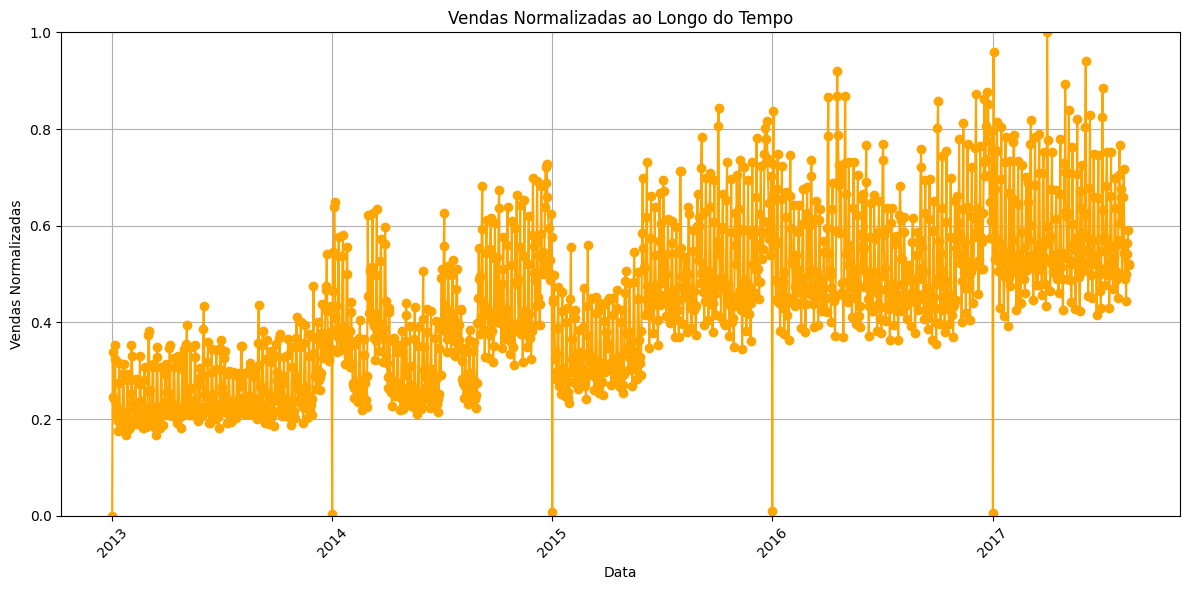

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(df_sales['date'], df_sales['normalized_sales'], marker='o', color='orange')
plt.title('Vendas Normalizadas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas Normalizadas')
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=1)  # Escala entre 0 e 1
plt.grid()
plt.tight_layout()
plt.show()

In [51]:
df_sales.sales.describe()

count    1.684000e+03
mean     6.375564e+05
std      2.344102e+05
min      2.511619e+03
25%      4.427115e+05
50%      6.321889e+05
75%      7.859455e+05
max      1.463084e+06
Name: sales, dtype: float64

In [69]:
start_date = df_sales['date'].min()
end_date = df_sales['date'].max()
full_range = pd.date_range(start=start_date, end=end_date, freq='D')

In [70]:
missing_dates = full_range.difference(df_sales['date'])
missing_dates

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

In [71]:
df_sales['date'] = pd.to_datetime(df_sales['date'])
df_sales.set_index('date', inplace=True)

In [86]:

df_full = df_sales.reindex(full_range)
df_full = df_full.fillna(0)

In [81]:
df_full

,sales,normalized_sales
2013-01-01,2511.618999,0.000000
2013-01-02,496092.417944,0.337937
2013-01-03,361461.231124,0.245760
2013-01-04,354459.677093,0.240966
2013-01-05,477350.121229,0.325104
...,...,...
2017-08-11,826373.722022,0.564068
2017-08-12,792630.535079,0.540965
2017-08-13,865639.677471,0.590952
2017-08-14,760922.406081,0.519256


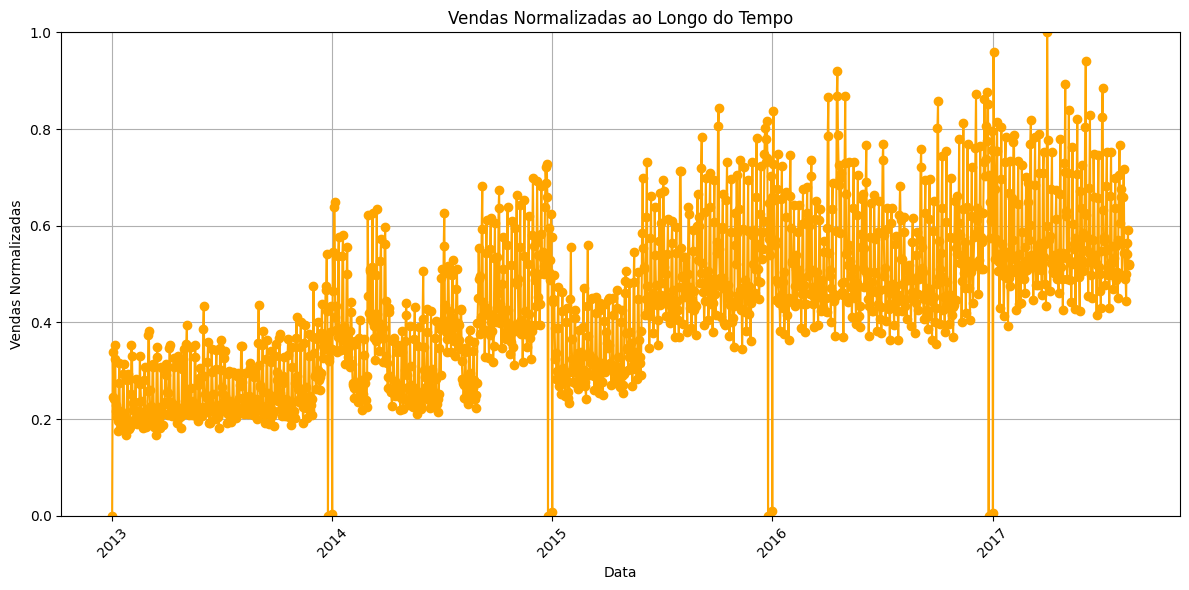

In [88]:
plt.figure(figsize=(12, 6))
plt.plot(df_full.index, df_full['normalized_sales'], marker='o', color='orange')
plt.title('Vendas Normalizadas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas Normalizadas')
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=1)  # Escala entre 0 e 1
plt.grid()
plt.tight_layout()
plt.show()

# pre processing 1

In [91]:
df_grouped['date'] = pd.to_datetime(df_grouped['date'])

start_date = df_grouped['date'].min()
end_date = df_grouped['date'].max()

idx = pd.date_range(start_date, end_date)


In [93]:
families = df_grouped['family'].unique()
all_combinations = pd.MultiIndex.from_product([idx, families], names=['date', 'family'])

In [98]:
df1 = df_grouped.set_index(['date', 'family']).reindex(all_combinations).reset_index()

In [102]:
df1['sales'] = df1['sales'].fillna(0)

# split

In [106]:
split=int(0.8 * len(df1))
train=df1[:split]
test=df1[split:]

In [107]:
train

,date,family,sales
0,2013-01-01,AUTOMOTIVE,0.00000
1,2013-01-01,BABY CARE,0.00000
2,2013-01-01,BEAUTY,2.00000
3,2013-01-01,BEVERAGES,810.00000
4,2013-01-01,BOOKS,0.00000
...,...,...,...
44558,2016-09-12,DAIRY,43470.00000
44559,2016-09-12,DELI,13788.85799
44560,2016-09-12,EGGS,12698.00000
44561,2016-09-12,FROZEN FOODS,4999.79801


# pre processing 2

In [109]:
scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()

In [110]:
train['normalized_sales'] = scaler_train.fit_transform(train[['sales']])
test['normalized_sales'] = scaler_test.fit_transform(test[['sales']])

C:\Users\angel\AppData\Local\Temp\ipykernel_2348\1112164286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['normalized_sales'] = scaler_train.fit_transform(train[['sales']])
C:\Users\angel\AppData\Local\Temp\ipykernel_2348\1112164286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['normalized_sales'] = scaler_test.fit_transform(test[['sales']])


In [112]:
test

,date,family,sales,normalized_sales
44563,2016-09-12,GROCERY II,826.000000,0.001743
44564,2016-09-12,HARDWARE,65.000000,0.000137
44565,2016-09-12,HOME AND KITCHEN I,1281.000000,0.002703
44566,2016-09-12,HOME AND KITCHEN II,1203.000000,0.002538
44567,2016-09-12,HOME APPLIANCES,17.000000,0.000036
...,...,...,...,...
55699,2017-08-15,POULTRY,17586.709986,0.037102
55700,2017-08-15,PREPARED FOODS,4641.522980,0.009792
55701,2017-08-15,PRODUCE,125108.971000,0.263941
55702,2017-08-15,SCHOOL AND OFFICE SUPPLIES,2530.000000,0.005338


In [111]:
train

,date,family,sales,normalized_sales
0,2013-01-01,AUTOMOTIVE,0.00000,0.000000
1,2013-01-01,BABY CARE,0.00000,0.000000
2,2013-01-01,BEAUTY,2.00000,0.000003
3,2013-01-01,BEVERAGES,810.00000,0.001389
4,2013-01-01,BOOKS,0.00000,0.000000
...,...,...,...,...
44558,2016-09-12,DAIRY,43470.00000,0.074534
44559,2016-09-12,DELI,13788.85799,0.023643
44560,2016-09-12,EGGS,12698.00000,0.021772
44561,2016-09-12,FROZEN FOODS,4999.79801,0.008573
